# <center>PROJECT 2 - IMAGE PROCESSING</center>

&nbsp;
### Sinh viên thực hiện
- Họ và tên: Võ Quốc Bình
- MSSV: 21127233
- Lớp học phần: 21CLC08 - Toán ứng dụng và thống kê cho CNTT

### Nhập thư viện

In [120]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Xử lí đầu vào

- Kiểm tra tên file có trong thư mục không

In [121]:
def is_valid_file(file_path):
    try:
        # Mở file để kiểm tra xem có thể đọc được hay không
        with open(file_path, 'r'):
            return True
    except FileNotFoundError:
        # File không tồn tại
        return False
    except IsADirectoryError:
        # Đường dẫn trỏ đến thư mục, không phải là tệp
        return False
    except:
        return False


- Nhập tên file

In [122]:
def input_data():
    # Nhập tên file
    while True:
        filename = input('Enter name of an image: ')
        typefile = filename[len(filename)-3:]
        if ((typefile == 'jpg' or typefile == 'png') and (is_valid_file(filename))):
            break

    # Nhập lựa chọn từ 0 đến 7. Nếu khác giá trị từ 0 đén 7, gán lựa chọn = 0
    print("Options: ")
    print("0. All options")
    print("1. Change the brightness of image")
    print("2. Change the contrast of image")
    print("3. Flip image (vertical/horizontal)")
    print("4. Convert RGB image to grayscale/sepia")
    print("5. Blur/Sharpen image")
    print("6. Crop image to size (crop in center)")
    print("7. Crop the photo in a circular frame")

    option = int(input("Input your option: "))
    if not (option <= 7 and option >= 0):
        option = 0

    return filename, option


- Tiền xử lí

In [123]:
def change_to_array(filename):
    # Mở hình ảnh
    image = Image.open(filename)
    # Convert to numpy array (3D matrix)
    image_array = np.array(image)
    return image_array

#### Xuất ảnh

In [124]:
def output_image(image_array):
    image = Image.fromarray(image_array.astype(np.uint8))
    return image

### Xử lí các chức năng ảnh

#### Thay đổi độ sáng cho ảnh

In [125]:
def change_brightness(image_array, brightness=50):
    output_image = image_array.copy()

    output_image = np.clip(output_image+int(brightness), 0, 255)
    return output_image


#### Thay đổi độ tương phản 

In [126]:
def change_constract(image_array, contrast=50):
    output_image = image_array.copy()
    contrast = float(contrast)

    factor = (259 * (255 + contrast)) / (255 * (259 - contrast))
    # Điều chỉnh độ tương phản của ảnh
    output_image = factor*(output_image-128)*128

    # Giới hạn giá trị pixel trong khoảng từ 0 đến 255
    output_image = np.clip(output_image, 0, 255)

    return output_image


#### Lật ảnh

* Lật dọc

In [127]:
def flip_vertically(image_array):
    output_image = image_array[::-1, :]
    return output_image


* Lật ngang

In [128]:
def flip_horizontally(image_array):
    output_image = image_array[:, ::-1]
    return output_image


#### Chuyển ảnh màu RGB

* Màu xám

In [129]:
def change_to_grayscale(image_array):
    gray_image = np.zeros(image_array.shape)
    R = np.array(image_array[:, :, 0])
    G = np.array(image_array[:, :, 1])
    B = np.array(image_array[:, :, 2])

    R = (R * .299)
    G = (G * .587)
    B = (B * .114)

    Avg = (R+G+B)
    gray_image = image_array.copy()

    for i in range(3):
        gray_image[:, :, i] = Avg

    return gray_image


* Màu sepia

In [130]:
def change_to_sepia(image_array):
    # Create a new array for the sepia tone image
    sepia_array = np.empty_like(image_array)
    sepia_matrix = np.array([[0.393, 0.769, 0.189],
                            [0.349, 0.686, 0.168],
                            [0.272, 0.534, 0.131]])

    # Apply the sepia transformation to each pixel
    sepia_array = image_array[..., :3] @ sepia_matrix.T

    # Clip the pixel values to the valid range (0 to 255)
    sepia_array = np.clip(sepia_array, 0, 255)
    
    return sepia_array


#### Làm mờ/ Làm nét ảnh

* Làm mờ ảnh

In [131]:
def blur_image(image_array):
    blur_kernel = np.array([[[1], [2], [1]],
                            [[2], [4], [2]],
                            [[1], [2], [1]]])
    blur_kernel = blur_kernel/(np.sum(blur_kernel))

    output_image = image_array.copy()

    for _ in range(10):
        temp = output_image.copy()
        output_image = temp.copy()
        cols = image_array.shape[0]
        rows = image_array.shape[1]
        kernel_size = int(len(image_array))

        padded_image = np.zeros(
            (output_image.shape[0] + 2, output_image.shape[1] + 2, output_image.shape[2]))
        padded_image[1:-1, 1:-1, :] = output_image

        for col in range(0, cols):
            for row in range(0, rows):
                output_image[col][row] = (
                    padded_image[col:col+3, row:row+3] * blur_kernel).sum(axis=1).sum(axis=0)

    return output_image


* Làm sắc nét ảnh

In [132]:
def sharpen_image(image_array):
    # Define the sharpening kernel
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])

    rows = image_array.shape[0]
    cols = image_array.shape[1]
    channels = image_array.shape[2]

    sharpened_image = image_array.copy()
    for channel in range(channels):
        for r in range(1, rows-1):
            for c in range(1, cols-1):
                neighborhood = image_array[r-1:r+2, c-1:c+2, channel]
                sharpened_pixel_value = np.sum(neighborhood * sharpen_kernel)
                sharpened_image[r, c, channel] = np.clip(image_array[r, c, channel] + (
                    sharpened_pixel_value - image_array[r, c, channel]), 0, 255)


    return sharpened_image


#### Cắt hình ở trung tâm

In [133]:
def crop_center(image_array):
    edge_size = int(min(image_array.shape[0],image_array.shape[1])/2)

    height, width = image_array.shape[:2]

    start_h = (height - edge_size) // 2
    start_w = (width - edge_size) // 2

    cropped_image = image_array[start_h:start_h +
                                edge_size, start_w:start_w+edge_size]

    return cropped_image


#### Cắt hình tròn

In [134]:
def crop_circle(image_array):
    # get the picture frame
    edge_size = int(min(image_array.shape[0], image_array.shape[1]))

    # get the size of original picture
    height, width = image_array.shape[:2]

    start_h = (height - edge_size) // 2
    start_w = (width - edge_size) // 2

    cropped_image = image_array[start_h:start_h +
                                edge_size, start_w:start_w+edge_size]

    # create a matrix to mark element int circle frame
    mask = np.zeros_like(cropped_image, dtype=bool)
    radius = edge_size//2
    center = (radius, radius)
    for y in range(edge_size):
        for x in range(edge_size):
            # formula circle area: (x-a)^2 + (y-b)^2 <= r^2
            if (x - center[1])**2 + (y - center[0])**2 <= radius**2:
                mask[y, x] = True

    # apply the mask to the image
    cropped_image[~mask] = 0

    return cropped_image


#### Cắt 2 hình ellipse chéo nhau

In [135]:
def crop_two_cross_ellipse(image_array):
    # get the picture frame
    edge_size = int(min(image_array.shape[0], image_array.shape[1]))

    # get the size of original picture
    height, width = image_array.shape[:2]

    start_h = (height - edge_size) // 2
    start_w = (width - edge_size) // 2

    cropped_image = image_array[start_h:start_h +
                                edge_size, start_w:start_w+edge_size]

    # create a matrix to mark element int circle frame
    mask = np.zeros_like(cropped_image, dtype=bool)
    radius = edge_size/2
    center = (radius, radius)

    major_axis = radius*1.25
    minor_axis = radius*0.671875
    angle_radians_prime = np.deg2rad(45)
    angle_radians_sub = np.deg2rad(-45)

    # crop prime ellipse
    for y in range(edge_size):
        for x in range(edge_size):
            distance_1 = ((x-center[0])*np.cos(angle_radians_prime) +
                          (y-center[1])*np.sin(angle_radians_prime))**2/minor_axis**2
            distance_2 = ((x-center[0])*np.sin(angle_radians_prime) -
                          (y-center[1])*np.cos(angle_radians_prime))**2/major_axis**2

            if(distance_1+distance_2) <= 1:
                mask[y, x] = True

    # crop sub ellipse
    for y in range(edge_size):
        for x in range(edge_size):
            distance_1 = ((x-center[0])*np.sin(angle_radians_sub) +
                          (y-center[1])*np.cos(angle_radians_sub))**2/minor_axis**2
            distance_2 = ((x-center[0])*np.cos(angle_radians_sub) -
                          (y-center[1])*np.sin(angle_radians_sub))**2/major_axis**2

            if(distance_1+distance_2) <= 1:
                mask[y, x] = True

    # apply the mask to the image
    cropped_image[~mask] = 0

    return cropped_image


#### Xử lí các lựa chọn

#### Hàm main demo chương trình

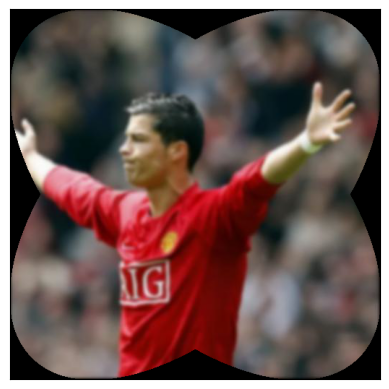

In [136]:
def main():
    filename = "output.jpg"

    image_array = change_to_array(filename)
    image = output_image(sharpen_image(image_array))
    image.save('output2.jpg')

    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)

main()
